# Shaleen Gupta, 2022UCP1296

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd            
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# About The Dataset

This Dataset is taken from the UCI Repository, 
"A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess."

<h3>We want to predict whether a student will graduate or drop out from university using the data provided at the end of 2nd semester.</h3>

In [159]:
df = pd.read_csv('data.csv', delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [160]:
df = df.rename(columns={'Nacionality': 'Nationality'})

# 1. Exploratory Data Analysis

<h2> Section 1.1 </h2>

In [161]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [162]:
df.duplicated().sum()

0

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [164]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<h2> Section 1.2 </h2>

<Axes: xlabel='Target', ylabel='count'>

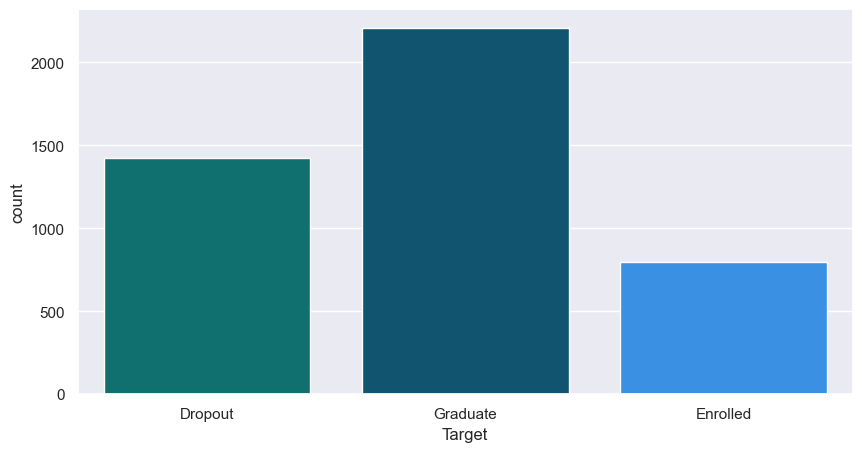

In [165]:
sns.set(rc={'figure.figsize':(10, 5)})

colors = ['#008080', '#005B7F', '#1E90FF']

sns.set_palette(colors)

sns.countplot(x=df['Target'])

In [166]:
df_raw = df.copy()

count_0 = df['Target'].value_counts()[0]
count_1 = df['Target'].value_counts()[1]
count_2 = df['Target'].value_counts()[2]

print("Count Of Target Dropout: ",count_0)
print("Count Of Target Graduate: ",count_1)
print("Count Of Target Enrolled: ",count_2)

print("Percentage of class Dropout samples : ",(count_0/(count_0+count_1+count_2))*100,"%")
print("Percentage of class Enrolledsamples : ",(count_1/(count_0+count_1+count_2))*100,"%")
print("Percentage of class Graduate samples : ",(count_2/(count_0+count_1+count_2))*100,"%")

Count Of Target Dropout:  2209
Count Of Target Graduate:  1421
Count Of Target Enrolled:  794
Percentage of class Dropout samples :  49.93218806509946 %
Percentage of class Enrolledsamples :  32.120253164556964 %
Percentage of class Graduate samples :  17.94755877034358 %


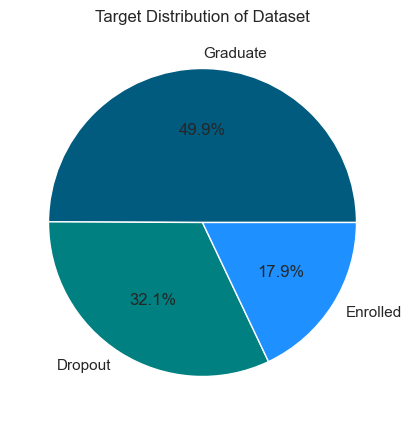

In [167]:
students_target = df['Target'].value_counts()

colors = ['#005B7F', '#008080', '#1E90FF']

plt.pie(students_target, colors=colors, labels=['Graduate', 'Dropout', 'Enrolled'], autopct='%2.1f%%')
plt.title('Target Distribution of Dataset')
plt.show()

**1.**) By this pie chart it can be concluded that approximately 50% of the students have graduated.<br>

**2.**) The number of students enrolled are under represented in the dataset.<br><br>


*********Conclusion Of This Section*********

We'll have to deal with the minority class in this dataset, maybe by creating synthetic samples of the minority class or by removing the minority class completely if there is not an extreme amount of data loss.

# Visualising The Marital status feature

In [168]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

Here according to the source of the dataset,
<br>************1 – single************<br>
************2 – married************<br>
************3 – widower************<br> 
************4 – divorced************<br> 
************5 – facto union************<br> 
************6 – legally separated************

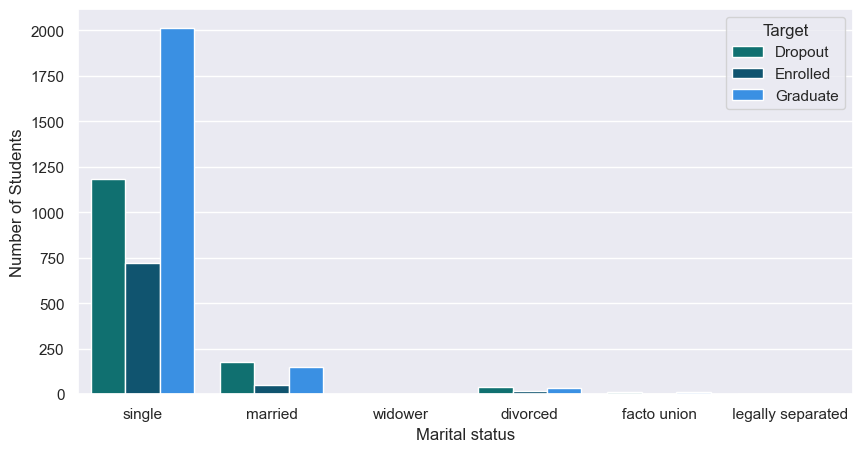

In [169]:
sns.countplot(data=df, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['single','married','widower','divorced','facto union',' legally separated'])
plt.ylabel('Number of Students')
plt.show()

Only the columns single and married should be kept as only these have sufficient amount of data to identify a pattern in it by the algorithm.

In [170]:
df = df[(df['Marital status'] == 1) | (df['Marital status'] == 2)]
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Visualising The Application mode feature

In [171]:
df['Application mode'].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26])

Here according to the source of the dataset,<br>

*****1 - 1st phase - general contingent <br>
2 - Ordinance No. 612/93 <br>
5 - 1st phase - special contingent (Azores Island) <br>
7 - Holders of other higher courses <br>
10 - Ordinance No. 854-B/99 <br>
15 - International student (bachelor) <br>
16 - 1st phase - special contingent (Madeira Island) <br>
17 - 2nd phase - general contingent <br>
18 - 3rd phase - general contingent <br>
26 - Ordinance No. 533-A/99, item b2) (Different Plan) <br>
27 - Ordinance No. 533-A/99, item b3 (Other Institution) <br>
39 - Over 23 years old <br>
42 - Transfer <br>
43 - Change of course 
44 - Technological specialization diploma holders <br>
51 - Change of institution/course <br>
53 - Short cycle diploma holders <br>
57 - Change of institution/course (International)*******

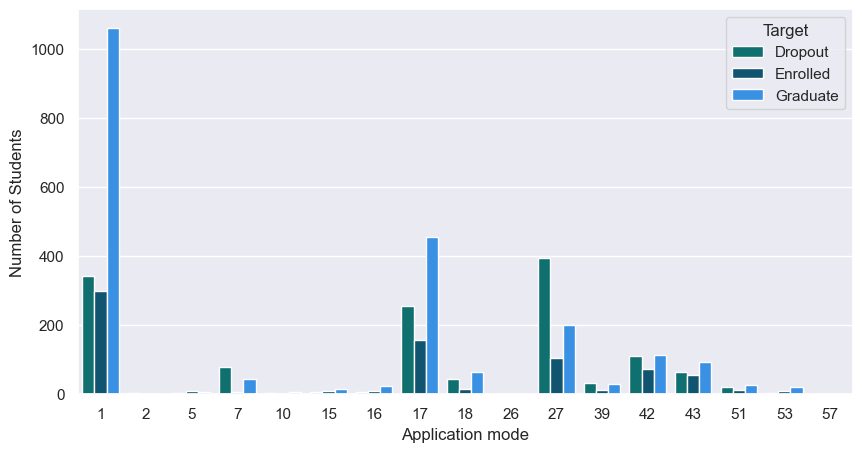

In [172]:
sns.countplot(data=df, x='Application mode', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels=['1','2','5','7','10','15','16','17','18','26','27','39','42','43','51','53','57'])
plt.ylabel('Number of Students')
plt.show()

By observing the above plot it can be concluded that,

****1.)**** The students who applied in 1st phase general contigent mode had the highest number of graduates.
<br>
****2.)**** The students who applied in Ordinance No. 533-A/99, item b3 (Other Institution) mode had the highest number of dropouts.

# Visualising The Application order feature

In [173]:
df['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0])

According to the source of the dataset,<br>
****Application order (between 0 - first choice; and 9 last choice)****	

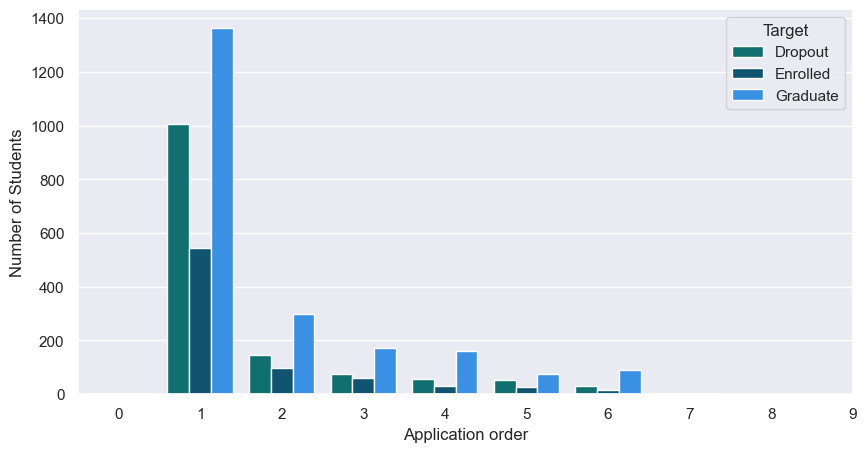

In [174]:
sns.countplot(data=df, x='Application order', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=['0','1','2','3','4','5','6','7','8','9'])
plt.ylabel('Number of Students')
plt.show()

As we can observe, there is some pattern in the application order and the number of students who graduate, dropout. So, this feature should be selected.

# Visualising the Course feature

In [175]:
df['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119])

According to the source of the dataset, <br>
*****33 - Biofuel Production Technologies <br>
171 - Animation and Multimedia Design <br>
8014 - Social Service (evening attendance)<br> 
9003 - Agronomy <br>
9070 - Communication Design <br>
9085 - Veterinary Nursing <br>
9119 - Informatics Engineering<br> 
9130 - Equinculture <br>
9147 - Management <br>
9238 - Social Service <br>
9254 - Tourism <br>
9500 - Nursing <br>
9556 - Oral Hygiene<br> 
9670 - Advertising and Marketing Management <br>
9773 - Journalism and Communication <br>
9853 - Basic Education <br>
9991 - Management (evening attendance)******

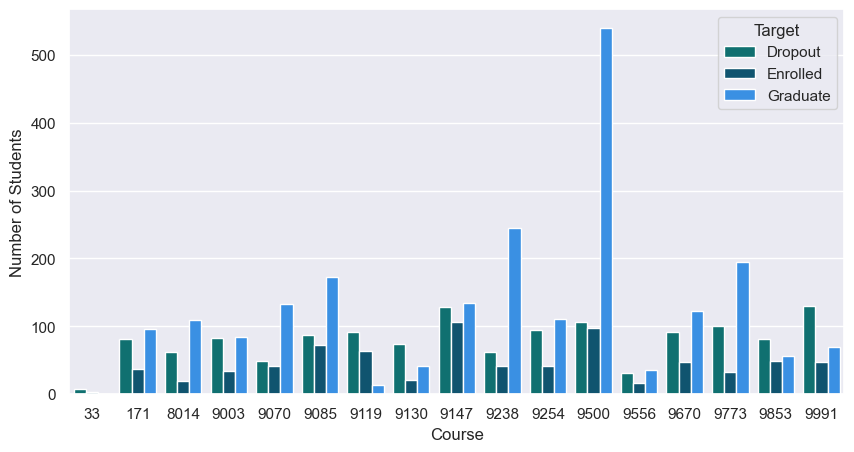

In [176]:
sns.countplot(data=df, x='Course', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels=['33','171','8014','9003','9070','9085','9119','9130','9147','9238','9254','9500','9556','9670','9773','9853','9991'])
plt.ylabel('Number of Students')
plt.show()

Now, some inferences that can be deduced are,

****1.)**** Nursing had the highest number of graduates.<br>
****2.)**** Management (evening attendance) had more number of dropouts than graduates.<br>
****3.)**** Management had almost equal number of graduates and dropouts.

# Visualising the Daytime/evening attendance

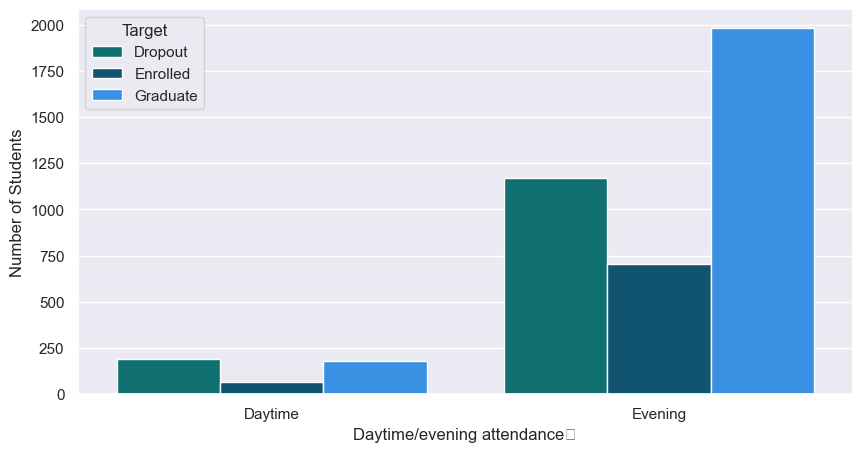

In [177]:
sns.countplot(data=df, x='Daytime/evening attendance\t', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Daytime', 'Evening'])
plt.ylabel('Number of Students')
plt.show()

Students having daytime attendance almost equal dropout and graduate rates.

# Visualising the Previous qualification feature

According to the source of the dataset,
<br>******1 - Secondary education <br>
2 - Higher education - bachelor's degree  <br>
3 - Higher education - degree  <br>
4 - Higher education - master's  <br>
5 - Higher education - doctorate  <br>
6 - Frequency of higher education  <br>
9 - 12th year of schooling - not completed <br> 
10 - 11th year of schooling - not completed  <br>
12 - Other - 11th year of schooling 14 - 10th year of schooling  <br>
15 - 10th year of schooling - not completed  <br>
19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.  <br>
38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.  <br>
39 - Technological specialization course  <br>
40 - Higher education - degree (1st cycle)  <br>
42 - Professional higher technical course  <br>
43 - Higher education - master (2nd cycle)******

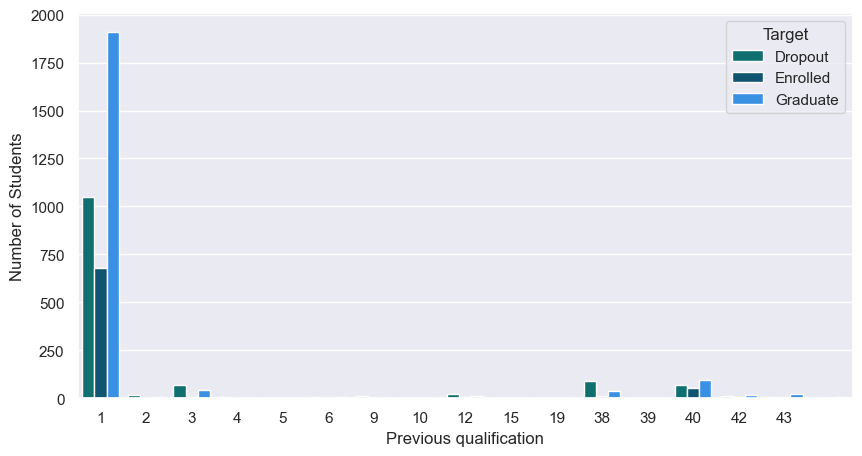

In [178]:
sns.countplot(data=df, x='Previous qualification', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], labels=['1','2','3','4','5','6','9','10','12','15','19','38','39','40','42','43'])
plt.ylabel('Number of Students')
plt.show()

As we can see, there is a clear high frequency bar graph of Secondary education overpowering all the other classes that could have been taken by that feature, so this is not a good predictor of the Target variable.<br>
So it should be removed.

In [179]:
to_drop = ['Previous qualification']

# Visualising the Previous qualification (grade) feature

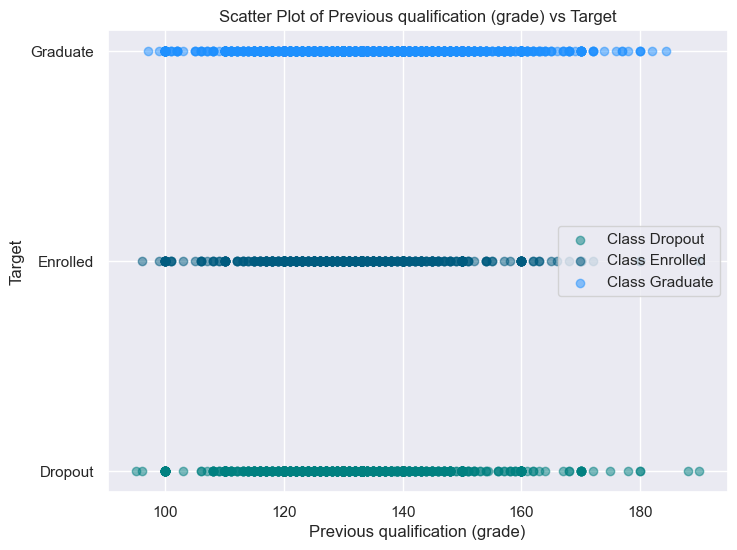

In [180]:
continuous_feature = df['Previous qualification (grade)']
target = df['Target']

colors = {'Dropout': '#008080', 'Enrolled': '#005B7F', 'Graduate': '#1E90FF'}  # Assuming three classes

plt.figure(figsize=(8, 6))
for class_label, color in colors.items():
    plt.scatter(continuous_feature[target == class_label], target[target == class_label], color=color, label=f'Class {class_label}', alpha=0.5)

plt.xlabel('Previous qualification (grade)')
plt.ylabel('Target')
plt.title('Scatter Plot of Previous qualification (grade) vs Target')
plt.legend()
plt.show()

As we can see, there is no direct relation between previous qualification grade and Target, as for the same grade the student can be dropout, graduate or enrolled.<br>
So, it should be dropped.

In [181]:
to_drop = ['Previous qualification', 'Previous qualification (grade)']

# Visualising the Nationality feature

According to the source of the dataset,<br>

***1 - Portuguese<br>
2 - German<br>
6 - Spanish<br>
11 - Italian<br>
13 - Dutch<br>
14 - English<br>
17 - Lithuanian<br>
21 - Angolan<br>
22 - Cape Verdean<br>
24 - Guinean<br>
25 - Mozambican<br>
26 - Santomean<br>
32 - Turkish<br>
41 - Brazilian<br>
62 - Romanian<br>
100 - Moldova (Republic of)<br>
101 - Mexican<br>
103 - Ukrainian<br>
105 - Russian<br>
108 - Cuban<br>
109 - Colombian<br>***

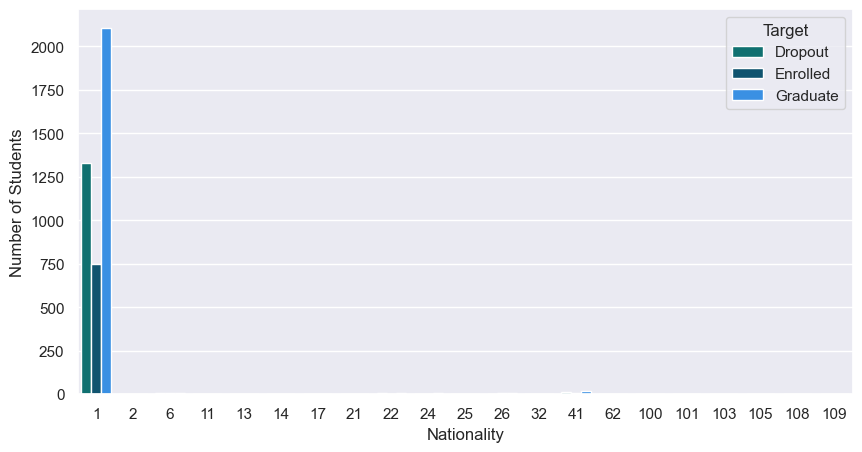

In [182]:
sns.countplot(data=df, x='Nationality', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=['1','2','6','11','13','14','17','21','22','24','25','26','32','41','62','100','101','103','105','108','109'])
plt.ylabel('Number of Students')
plt.show()

***Inference<br>***
Now here is an interesting result, in the whole dataset almost all the students are Protugese because this dataset was compiled by a portugese program so there is nothing new that this dataset is telling us for each sample, as for almost all the samples the student is going to be Portugese.<br>
This is the reason because of which it needs to be dropped.

In [183]:
to_drop = ['Previous qualification', 'Previous qualification (grade)', 'Nationality']

# Visualising the International feature

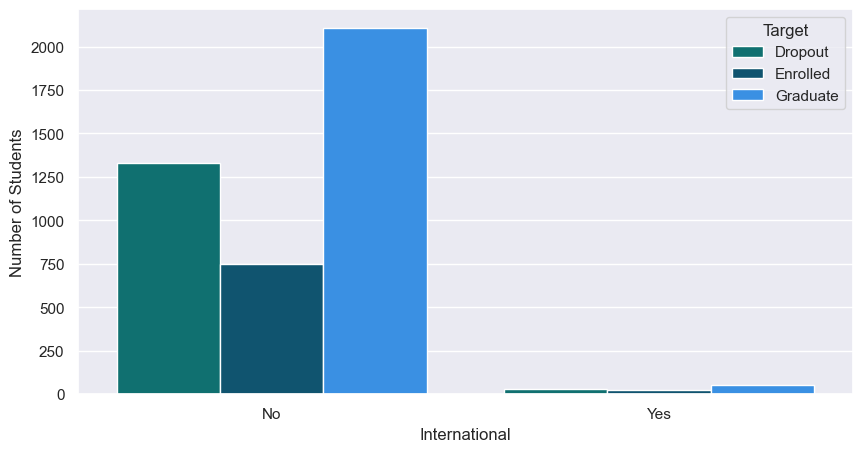

In [184]:
sns.countplot(data=df, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

****Observation<br>****
Now, as expected since the this dataset was compiled by a Portugese Program and we saw that this was the reason that most of the students listed here were Portugal, the International feature has a high frequency of No.<br>
Therefore it needs to be dropped.

In [185]:
to_drop = ['Previous qualification', 'Previous qualification (grade)', 'Nationality', 'International']


<h2>------------NOTE--------------<br></h2>

***Mother's qualification<br>                            
Father's qualification<br>                          
Mother's occupation<br>                               
Father's occupation<br>***

are not visualised here, as they have a very high number of classes and plotting these many classs will take a lot of time.

# Visualising the Admission grade feature

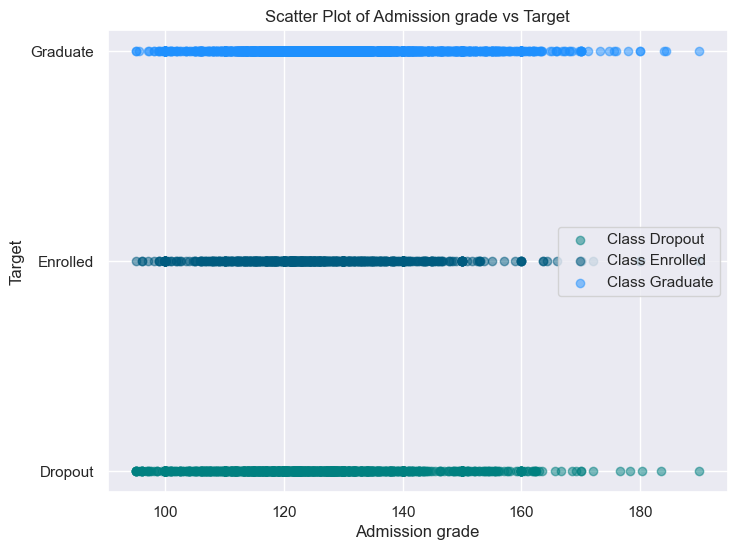

In [186]:
continuous_feature = df['Admission grade']
target = df['Target']

colors = {'Dropout': '#008080', 'Enrolled': '#005B7F', 'Graduate': '#1E90FF'}  # Assuming three classes

plt.figure(figsize=(8, 6))
for class_label, color in colors.items():
    plt.scatter(continuous_feature[target == class_label], target[target == class_label], color=color, label=f'Class {class_label}', alpha=0.5)

plt.xlabel('Admission grade')
plt.ylabel('Target')
plt.title('Scatter Plot of Admission grade vs Target')
plt.legend()
plt.show()

A similar kind of pattern can be seen here as it was with Previous qualification (grade), so we should also drop this feature because of the same reason.<br>
But we can always come back and consider this feature and see if the evaluation metric improves.

In [187]:
to_drop = ['Previous qualification', 'Previous qualification (grade)', 'Nationality', 'International', 'Admission grade']

# Visualising the Displaced feature

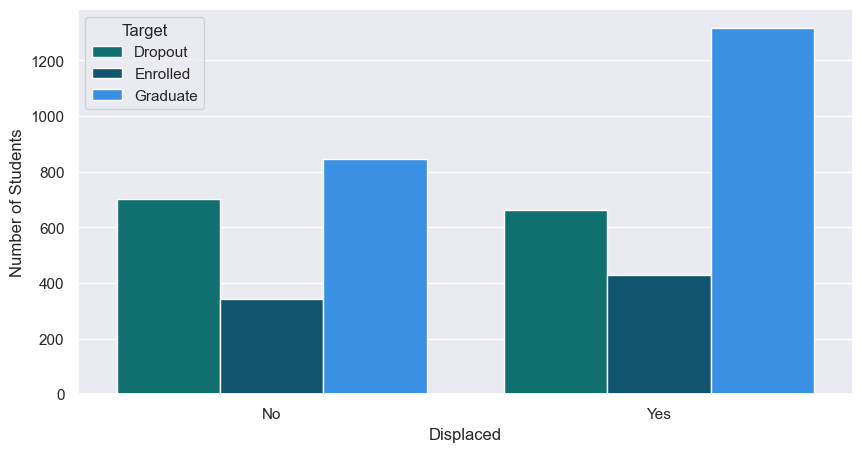

In [188]:
sns.countplot(data=df, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

Here is another interesting observation, out of all the students who graduate majority of them are displaced.

# Visualising the Educational special needs feature 

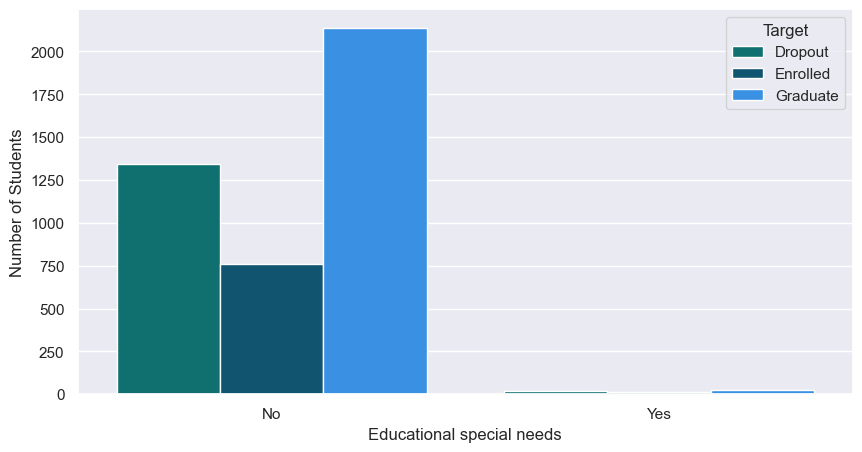

In [189]:
sns.countplot(data=df, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

Almost all the students do not need any kind of Educational special needs, so this feature can also be dropped.

In [190]:
to_drop = ['Previous qualification', 
           'Previous qualification (grade)', 
           'Nationality', 'International', 
           'Admission grade', 'Educational special needs'
          ]

# Visualising the Debtor feature

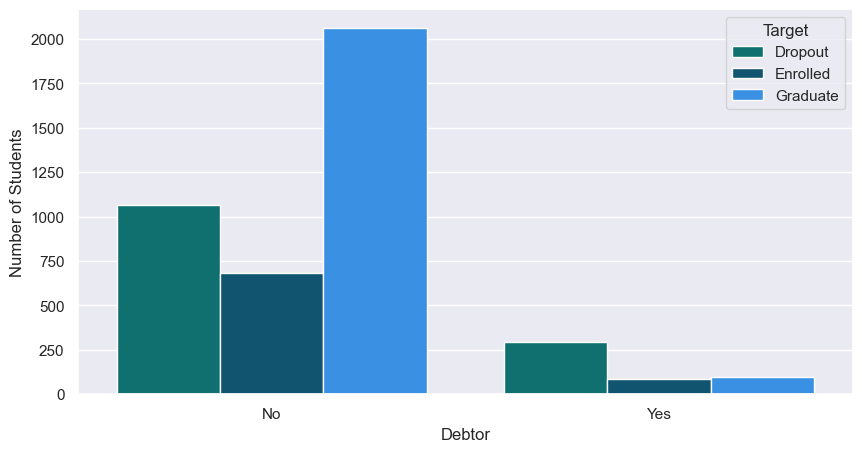

In [191]:
sns.countplot(data=df, x='Debtor', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

As expected, the students who have Debt dropout of the universities (can be seen in the No part pf the chart)

# Visualising the Gender feature

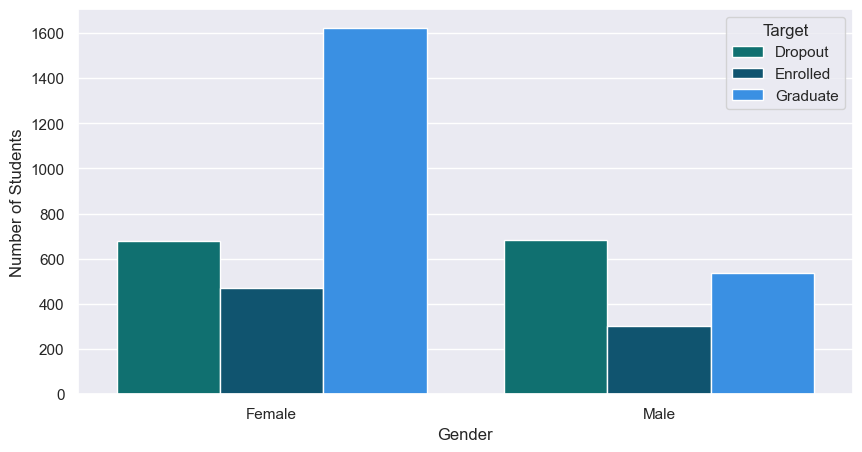

In [192]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

Females have higher number of graduates as compared to males.

# Visualising the Scholarship holder feature

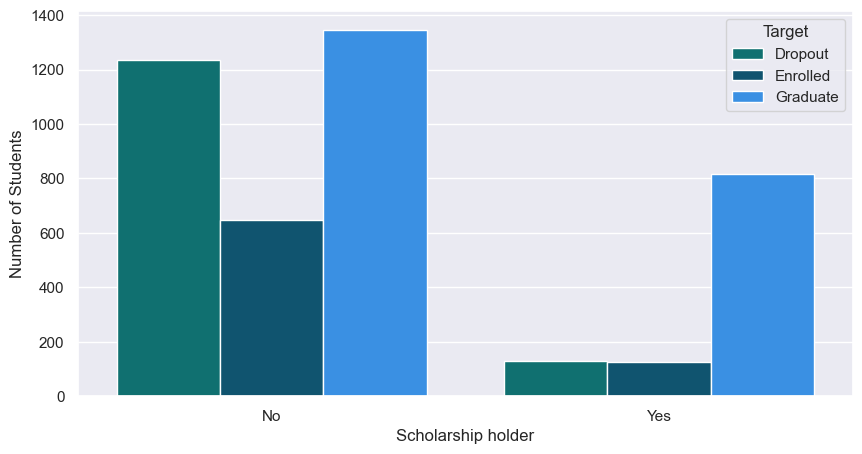

In [193]:
sns.countplot(data=df, x='Scholarship holder', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

As expected, the students who are scholarship holders have very low dropout rates as compared to their graduate rates.

# Visualising the Age at enrollment feature 

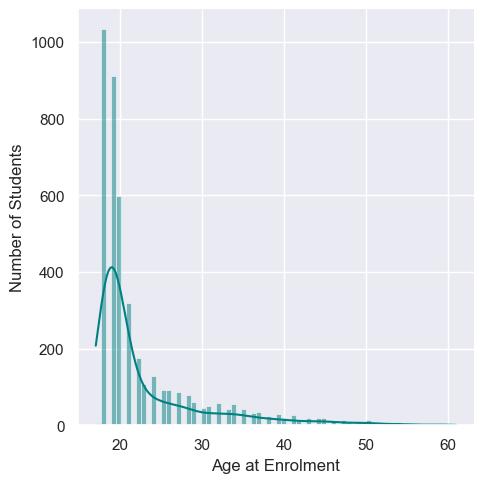

In [194]:
sns.displot(data=df, x='Age at enrollment', kde=True)
df['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

This is a positively skewed curve, as the tail is more pronounced on the right side.<br>
It can be seen that most of the students enroll in universities in their late teens and early 20s.<br>
The enrollments in universities show steady decline after 22-23.

****Conclusion of this section****<br>
We have now selected most of the columns that we want to discard, this will help in designing our machine learning model.<br>
Now we will select the most appropriate academic features from our dataset.

<h2>2. Encoding the Target Column </h2>

In [195]:
df_new = df[(df['Target'] == 'Dropout') | (df['Target'] == 'Graduate')]

df_new['Target'] = df_new['Target'].replace({'Dropout': 0, 'Graduate': 1})

df_new

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


<h3>IMPORTANT</h3>

***Now is probably the right time to address this, remember that earlier we saw a class imbalance in our dataset so we are going to resolve that. <br><br>
Recall what is the purpose of our Machine Lerning model, it is to predict that whether a student is going to graduate or is going to drop out of the university based on his socio-economical, academic, macro-economic data.<br><br>
So, there is no use of predicting "Enrolled" students, so all the samples that have target label as "Enrolled" can be dropped.<br><br>
This also address our class imbalance problem, as enrolled students only comprised approximately 17% of our dataset.****

# 3. Heatmap For Academic Features

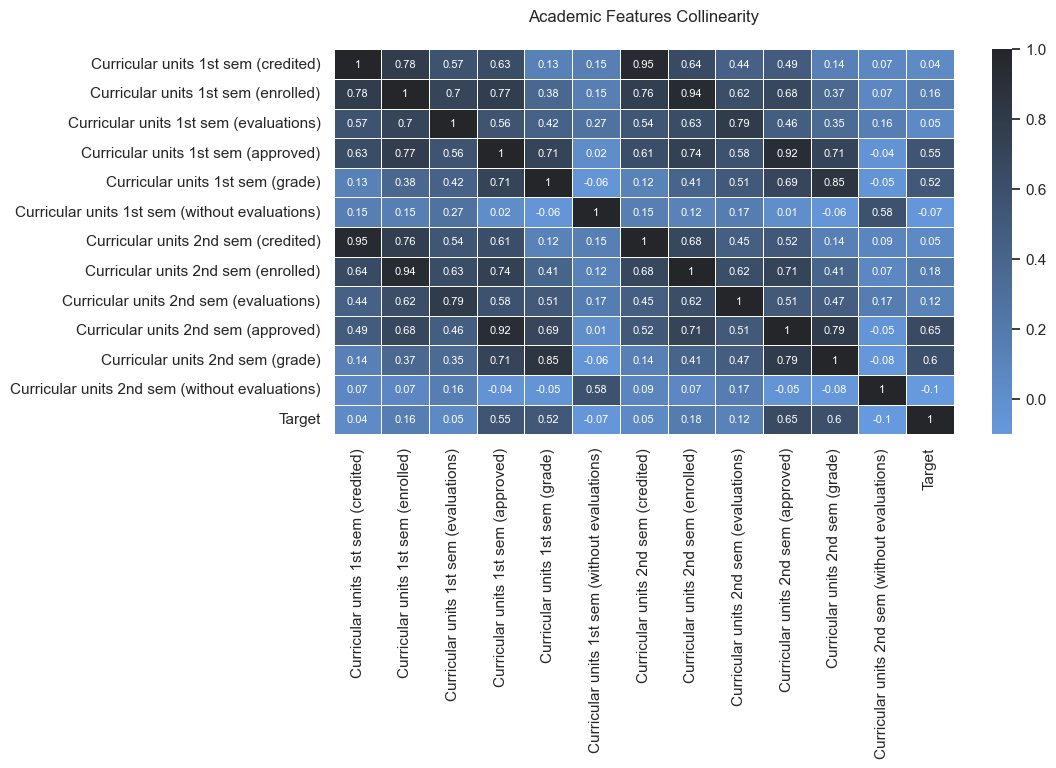

In [196]:
academic_features = df_new[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Target']]


sns.set(rc={"figure.figsize": (10, 5)})
sns.heatmap(academic_features.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))
# Customize the labels
plt.title('Academic Features Collinearity', pad=20)

plt.show()

****Observations****<br>

Curricular units 1st sem (credited) and Curricular units 2nd sem (credited) have very high correlation coefficient (0.94)<br><br>

Curricular units 1st sem (enrolled) and Curricular units 2nd sem (enrolled) have very high correlation coefficient (0.94)<br><br>

Curricular units 1st sem (approved) and Curricular units 2nd sem (approved) have very high correlation coefficient (0.9)<br><br>

Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) have high correlation coefficient (0.84)<br><br>

Target is correlated the most to Curricular units 2nd sem (approved) (0.65)<br><br>

***To reduce redundancy and potential overfitting in the dataset, remove feautures with similar correlations.***

In [197]:
to_drop = ['Previous qualification', 
           'Previous qualification (grade)', 
           'Nationality', 
           'International', 
           'Admission grade', 
           'Educational special needs',
           'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)',
           'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)',
           'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)',
           'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (without evaluations)'
          ]

<h4>Dropping the decided features</h4>

In [198]:
df_new.drop(to_drop, axis=1, inplace=True)
df_new

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,19,12,5,9,1,...,0,20,0,0,0,0.000000,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,3,3,3,1,...,0,19,6,6,6,13.666667,13.9,-0.3,0.79,1
2,1,1,5,9070,1,37,37,9,9,1,...,0,19,6,0,0,0.000000,10.8,1.4,1.74,0
3,1,17,2,9773,1,38,37,5,3,1,...,0,20,6,10,5,12.400000,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,37,38,9,9,0,...,0,45,6,6,6,13.000000,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,5,4,0,...,0,19,6,8,5,12.666667,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,1,9,9,1,...,0,18,6,6,2,11.000000,11.1,0.6,2.02,0
4421,1,1,1,9500,1,37,37,9,9,1,...,1,30,8,9,1,13.500000,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,37,37,7,4,1,...,1,20,5,6,5,12.000000,9.4,-0.8,-3.12,1


# 4. Splitting the data into training and testing sets and also Standardisation of the data

In [199]:
Y = df_new['Target']
df_new = df_new.drop('Target', axis=1)
X = df_new

In [200]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [201]:
Y_test.value_counts()

1    646
0    412
Name: Target, dtype: int64

As we can see, we have succesfully dealt with the problem of imbalanced classes in our dataset

# 5. Designing the ML Models

In [202]:
def reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test):
    
    print("\n\n\n***************************************TRAINING RESULTS***************************************\n\n\n")
    
    print("Train Precision : ",precision_score(Y_train, Y_pred_train))
    print("Train Recall : ",recall_score(Y_train, Y_pred_train))
    print("Train Accuracy : ",accuracy_score(Y_train, Y_pred_train))
    print("Train F1 Score : ",f1_score(Y_train, Y_pred_train))
    
    cm_train = confusion_matrix(Y_train, Y_pred_train)
    CM_train = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Non-Dropout', 'Dropout'])
    
    print("\n\n")
    
    print("-------------------------------Train Classification Report-------------------------------\n\n")
    
    print(classification_report(Y_train, Y_pred_train))
    
    print("--------------------------------------------------------------------------------------------")
    
    CM_train.plot()
    plt.show()
    
    print("\n\n\n**********************************************************************************************\n\n\n")
    
    
    
    
    print("\n\n\n***************************************TESTING RESULTS***************************************\n\n\n")
    
    print("Test Precision : ",precision_score(Y_test, Y_pred_test))
    print("Test Recall : ",recall_score(Y_test, Y_pred_test))
    print("Test Accuracy : ",accuracy_score(Y_test, Y_pred_test))
    print("Test F1 Score : ",f1_score(Y_test, Y_pred_test))
    
    cm_test = confusion_matrix(Y_test, Y_pred_test)
    CM_test = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Non-Dropout', 'Dropout'])
    
    print("\n\n")
    
    print("-------------------------------Test Classification Report-------------------------------\n\n")
    
    print(classification_report(Y_test, Y_pred_test))
    
    print("--------------------------------------------------------------------------------------------")
    
    CM_test.plot()
    plt.show()
    
    print("\n\n\n**********************************************************************************************\n\n\n")
    
    

# 5.1 Logistic Regression

In [215]:
def Logistic_Regression(X_train, X_test, Y_train, Y_test):
    
    algorithm1 = LogisticRegression(solver='lbfgs', max_iter=500)
    
    algorithm1.fit(X_train, Y_train)
    
    Y_pred_train = algorithm1.predict(X_train)
    
    Y_pred_test = algorithm1.predict(X_test)
    
    reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test)
    
    return




***************************************TRAINING RESULTS***************************************



Train Precision :  0.8887530562347188
Train Recall :  0.958470665787739
Train Accuracy :  0.9007293354943274
Train F1 Score :  0.9222962258166825



-------------------------------Train Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.92      0.81      0.86       951
           1       0.89      0.96      0.92      1517

    accuracy                           0.90      2468
   macro avg       0.91      0.88      0.89      2468
weighted avg       0.90      0.90      0.90      2468

--------------------------------------------------------------------------------------------


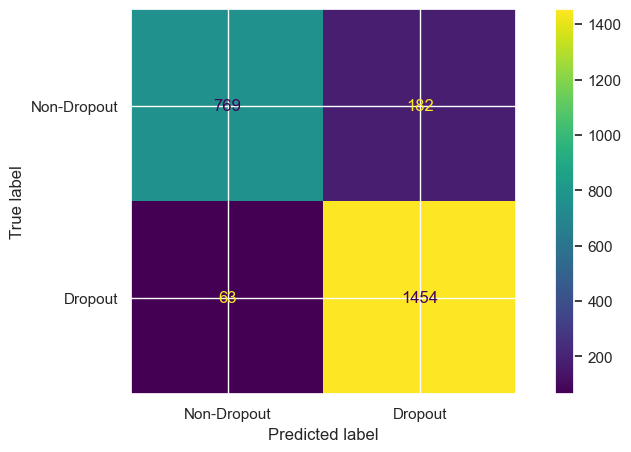




**********************************************************************************************






***************************************TESTING RESULTS***************************************



Test Precision :  0.8958031837916064
Test Recall :  0.958204334365325
Test Accuracy :  0.9064272211720227
Test F1 Score :  0.9259536275243082



-------------------------------Test Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.93      0.83      0.87       412
           1       0.90      0.96      0.93       646

    accuracy                           0.91      1058
   macro avg       0.91      0.89      0.90      1058
weighted avg       0.91      0.91      0.91      1058

--------------------------------------------------------------------------------------------


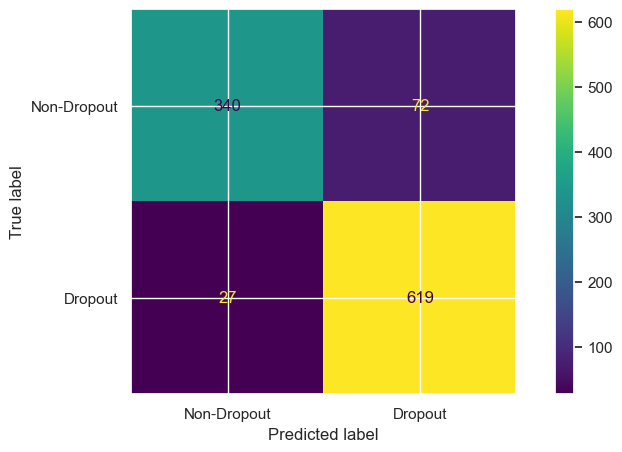




**********************************************************************************************





In [216]:
Logistic_Regression(X_train, X_test, Y_train, Y_test)

# 5.2 Decision Tree

In [213]:
def Decision_Tree(X_train, X_test, Y_train, Y_test):
    
    dt_classifier = DecisionTreeClassifier(criterion='gini',random_state=32,max_depth=6)
    
    dt_classifier.fit(X_train, Y_train)
    
    Y_pred_train = dt_classifier.predict(X_train)
    
    Y_pred_test = dt_classifier.predict(X_test)
    
    reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test)
    
    return




***************************************TRAINING RESULTS***************************************



Train Precision :  0.9043266301035954
Train Recall :  0.978246539222149
Train Accuracy :  0.9230145867098866
Train F1 Score :  0.9398353388220393



-------------------------------Train Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.96      0.83      0.89       951
           1       0.90      0.98      0.94      1517

    accuracy                           0.92      2468
   macro avg       0.93      0.91      0.92      2468
weighted avg       0.93      0.92      0.92      2468

--------------------------------------------------------------------------------------------


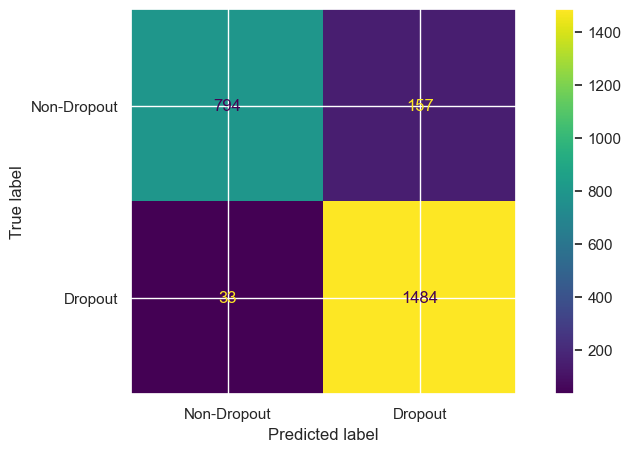




**********************************************************************************************






***************************************TESTING RESULTS***************************************



Test Precision :  0.8771186440677966
Test Recall :  0.9613003095975232
Test Accuracy :  0.8941398865784499
Test F1 Score :  0.9172821270310191



-------------------------------Test Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.93      0.79      0.85       412
           1       0.88      0.96      0.92       646

    accuracy                           0.89      1058
   macro avg       0.90      0.88      0.89      1058
weighted avg       0.90      0.89      0.89      1058

--------------------------------------------------------------------------------------------


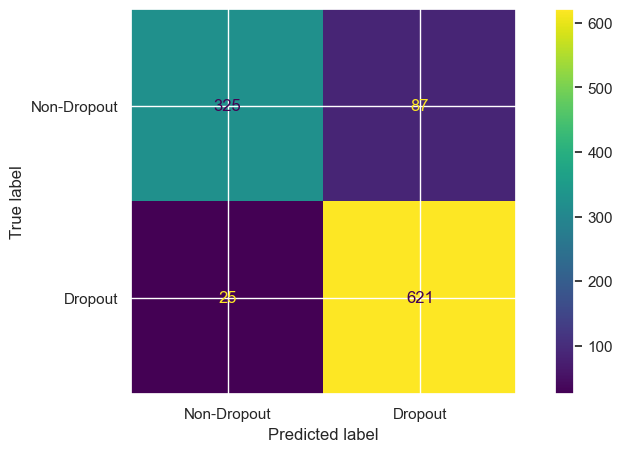




**********************************************************************************************





In [214]:
Decision_Tree(X_train, X_test, Y_train, Y_test)

# 5.3 Random Forest

In [207]:
def Random_Forest(X_train, X_test, Y_train, Y_test):
    
    algorithm2 = RandomForestClassifier(n_estimators=500)
    
    algorithm2.fit(X_train, Y_train)
    
    Y_pred_train = algorithm2.predict(X_train)
    
    Y_pred_test = algorithm2.predict(X_test)
    
    reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test)
    
    return




***************************************TRAINING RESULTS***************************************



Train Precision :  1.0
Train Recall :  1.0
Train Accuracy :  1.0
Train F1 Score :  1.0



-------------------------------Train Classification Report-------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       951
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      2468
   macro avg       1.00      1.00      1.00      2468
weighted avg       1.00      1.00      1.00      2468

--------------------------------------------------------------------------------------------


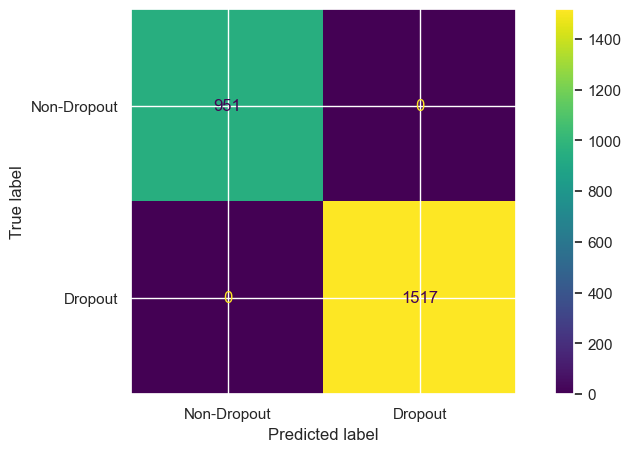




**********************************************************************************************






***************************************TESTING RESULTS***************************************



Test Precision :  0.9056047197640118
Test Recall :  0.9504643962848297
Test Accuracy :  0.9092627599243857
Test F1 Score :  0.9274924471299094



-------------------------------Test Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       412
           1       0.91      0.95      0.93       646

    accuracy                           0.91      1058
   macro avg       0.91      0.90      0.90      1058
weighted avg       0.91      0.91      0.91      1058

--------------------------------------------------------------------------------------------


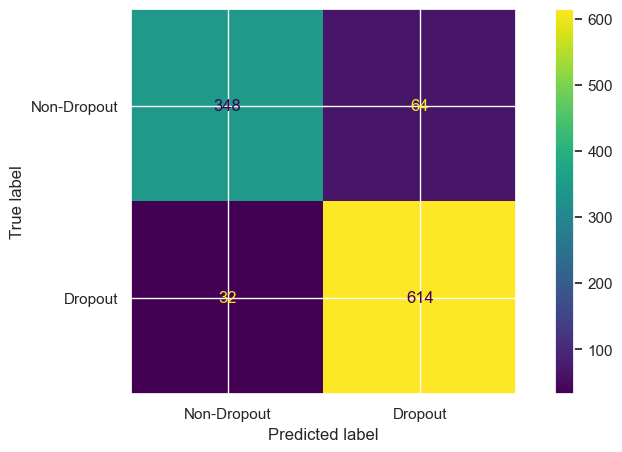




**********************************************************************************************





In [208]:
Random_Forest(X_train, X_test, Y_train, Y_test)

# 5.4 Support Vector Machine

In [209]:
def Support_Vector_Classifier(X_train, X_test, Y_train, Y_test):
    
    algorithm3 = SVC()
    
    algorithm3.fit(X_train, Y_train)
    
    Y_pred_train = algorithm3.predict(X_train)
    
    Y_pred_test = algorithm3.predict(X_test)
    
    reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test)
    
    return




***************************************TRAINING RESULTS***************************************



Train Precision :  0.8832731648616126
Train Recall :  0.967699406723797
Train Accuracy :  0.9015397082658023
Train F1 Score :  0.9235608681975465



-------------------------------Train Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.94      0.80      0.86       951
           1       0.88      0.97      0.92      1517

    accuracy                           0.90      2468
   macro avg       0.91      0.88      0.89      2468
weighted avg       0.90      0.90      0.90      2468

--------------------------------------------------------------------------------------------


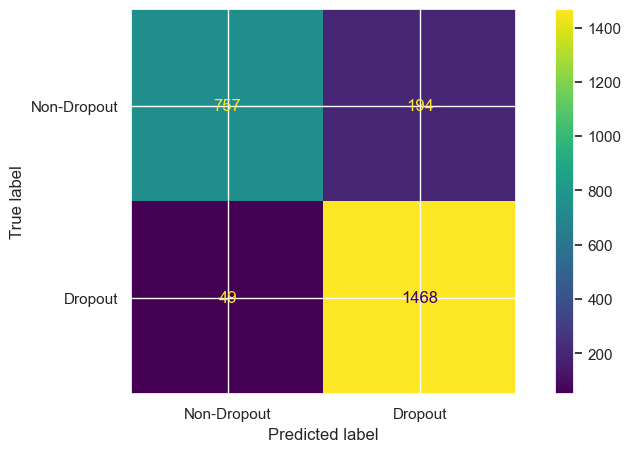




**********************************************************************************************






***************************************TESTING RESULTS***************************************



Test Precision :  0.890961262553802
Test Recall :  0.9613003095975232
Test Accuracy :  0.9045368620037807
Test F1 Score :  0.924795234549516



-------------------------------Test Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       412
           1       0.89      0.96      0.92       646

    accuracy                           0.90      1058
   macro avg       0.91      0.89      0.90      1058
weighted avg       0.91      0.90      0.90      1058

--------------------------------------------------------------------------------------------


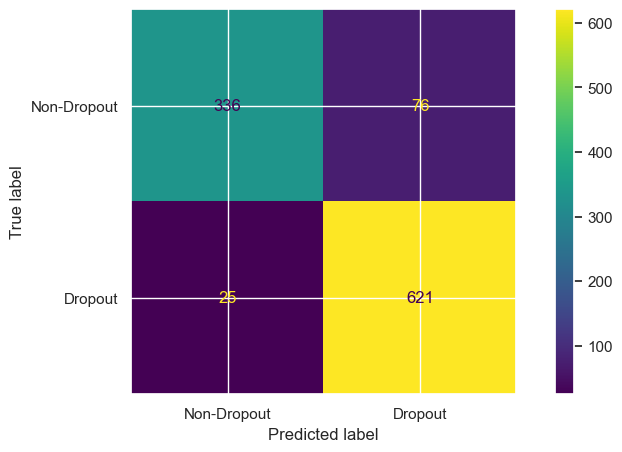




**********************************************************************************************





In [210]:
Support_Vector_Classifier(X_train, X_test, Y_train, Y_test)

# 5.5 MLP Classifier

In [211]:
def Neural_Network(X_train, X_test, Y_train, Y_test):
    
    algorithm4 = MLPClassifier(hidden_layer_sizes=(32,16,16,1), max_iter=1000, early_stopping=True, alpha=0, learning_rate='adaptive', solver='sgd', batch_size=32, verbose=True, activation='relu', random_state=49)
    
    algorithm4.fit(X_train, Y_train)
    
    Y_pred_train = algorithm4.predict(X_train)
    
    Y_pred_test = algorithm4.predict(X_test)
    
    reportResults(X_train, X_test, Y_train, Y_test, Y_pred_train, Y_pred_test)
    
    return





Iteration 1, loss = 0.66618217
Validation score: 0.615385
Iteration 2, loss = 0.65791827
Validation score: 0.615385
Iteration 3, loss = 0.64879201
Validation score: 0.615385
Iteration 4, loss = 0.63722968
Validation score: 0.615385
Iteration 5, loss = 0.61965547
Validation score: 0.631579
Iteration 6, loss = 0.59774701
Validation score: 0.716599
Iteration 7, loss = 0.57450752
Validation score: 0.769231
Iteration 8, loss = 0.55025571
Validation score: 0.801619
Iteration 9, loss = 0.52676132
Validation score: 0.813765
Iteration 10, loss = 0.50264347
Validation score: 0.842105
Iteration 11, loss = 0.47937712
Validation score: 0.842105
Iteration 12, loss = 0.45832500
Validation score: 0.858300
Iteration 13, loss = 0.43884029
Validation score: 0.854251
Iteration 14, loss = 0.42082367
Validation score: 0.870445
Iteration 15, loss = 0.40570564
Validation score: 0.886640
Iteration 16, loss = 0.39275610
Validation score: 0.882591
Iteration 17, loss = 0.38156685
Validation score: 0.894737
Iterat

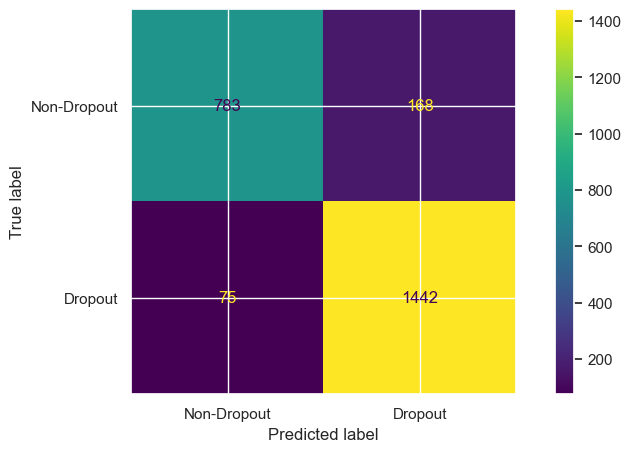




**********************************************************************************************






***************************************TESTING RESULTS***************************************



Test Precision :  0.9039881831610044
Test Recall :  0.9473684210526315
Test Accuracy :  0.9064272211720227
Test F1 Score :  0.9251700680272108



-------------------------------Test Classification Report-------------------------------


              precision    recall  f1-score   support

           0       0.91      0.84      0.88       412
           1       0.90      0.95      0.93       646

    accuracy                           0.91      1058
   macro avg       0.91      0.89      0.90      1058
weighted avg       0.91      0.91      0.91      1058

--------------------------------------------------------------------------------------------


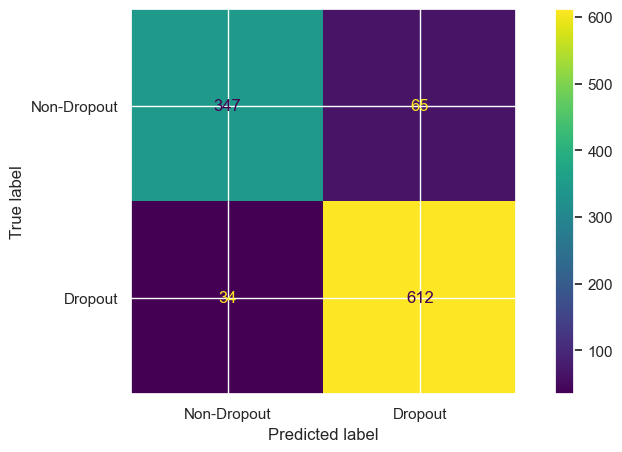




**********************************************************************************************





In [212]:
Neural_Network(X_train, X_test, Y_train, Y_test)

# 6. Final Results

<h2>********Logistic Regression********</h2><br><br>


    Test Precision :  0.895
    Test Recall :  0.958
    Test Accuracy :  0.906
    Test F1 Score :  0.925
    
<br><br><br>


<h2>********Decision Tree********</h2><br><br>


    Test Precision :  0.904
    Test Recall :  0.978
    Test Accuracy :  0.923
    Test F1 Score :  0.939
<br><br><br>


<h2>********Random Forest********</h2><br><br>


    Test Precision :  0.906
    Test Recall :  0.955
    Test Accuracy :  0.913
    Test F1 Score :  0.931
<br><br><br>


<h2>********Support Vector Classifier********</h2><br><br>


    Test Precision :  0.890
    Test Recall :  0.961
    Test Accuracy :  0.90
    Test F1 Score :  0.924
<br><br><br>


<h2>********MLP Classifier (Neural Network)********</h2><br><br>


    Test Precision :  0.903
    Test Recall :  0.947
    Test Accuracy :  0.906
    Test F1 Score :  0.925
<br><br><br>

<h6>In general, for almost all the parameters Decision Tree is the best algorithm.<br>
But, other models can also be chosen based on the requirements.</h6>